# Importing the necessary modules

In [7]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os
import glob

# Assiging Train and Test from the downloaded dataset

In [8]:
train_path = 'DATASET\DATASET\TRAIN'
test_path = 'DATASET\DATASET\TEST'

## Import Libraries for CNN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

## Visualization

In [10]:
# Data Loading and Preprocessing
from cv2 import cvtColor
from glob import glob

x_data = []
y_data = []

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) # Important: Convert to RGB
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [00:15<00:00, 647.70it/s] 


In [11]:
data.shape

(22564, 2)

In [12]:
from collections import Counter
Counter(y_data)

Counter({'DATASET\\DATASET\\TRAIN\\O': 12565,
         'DATASET\\DATASET\\TRAIN\\R': 9999})

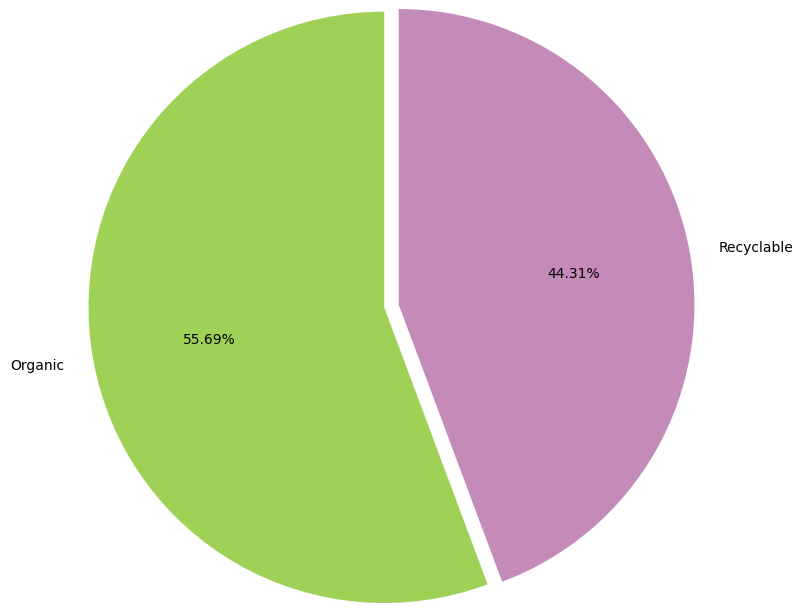

In [13]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

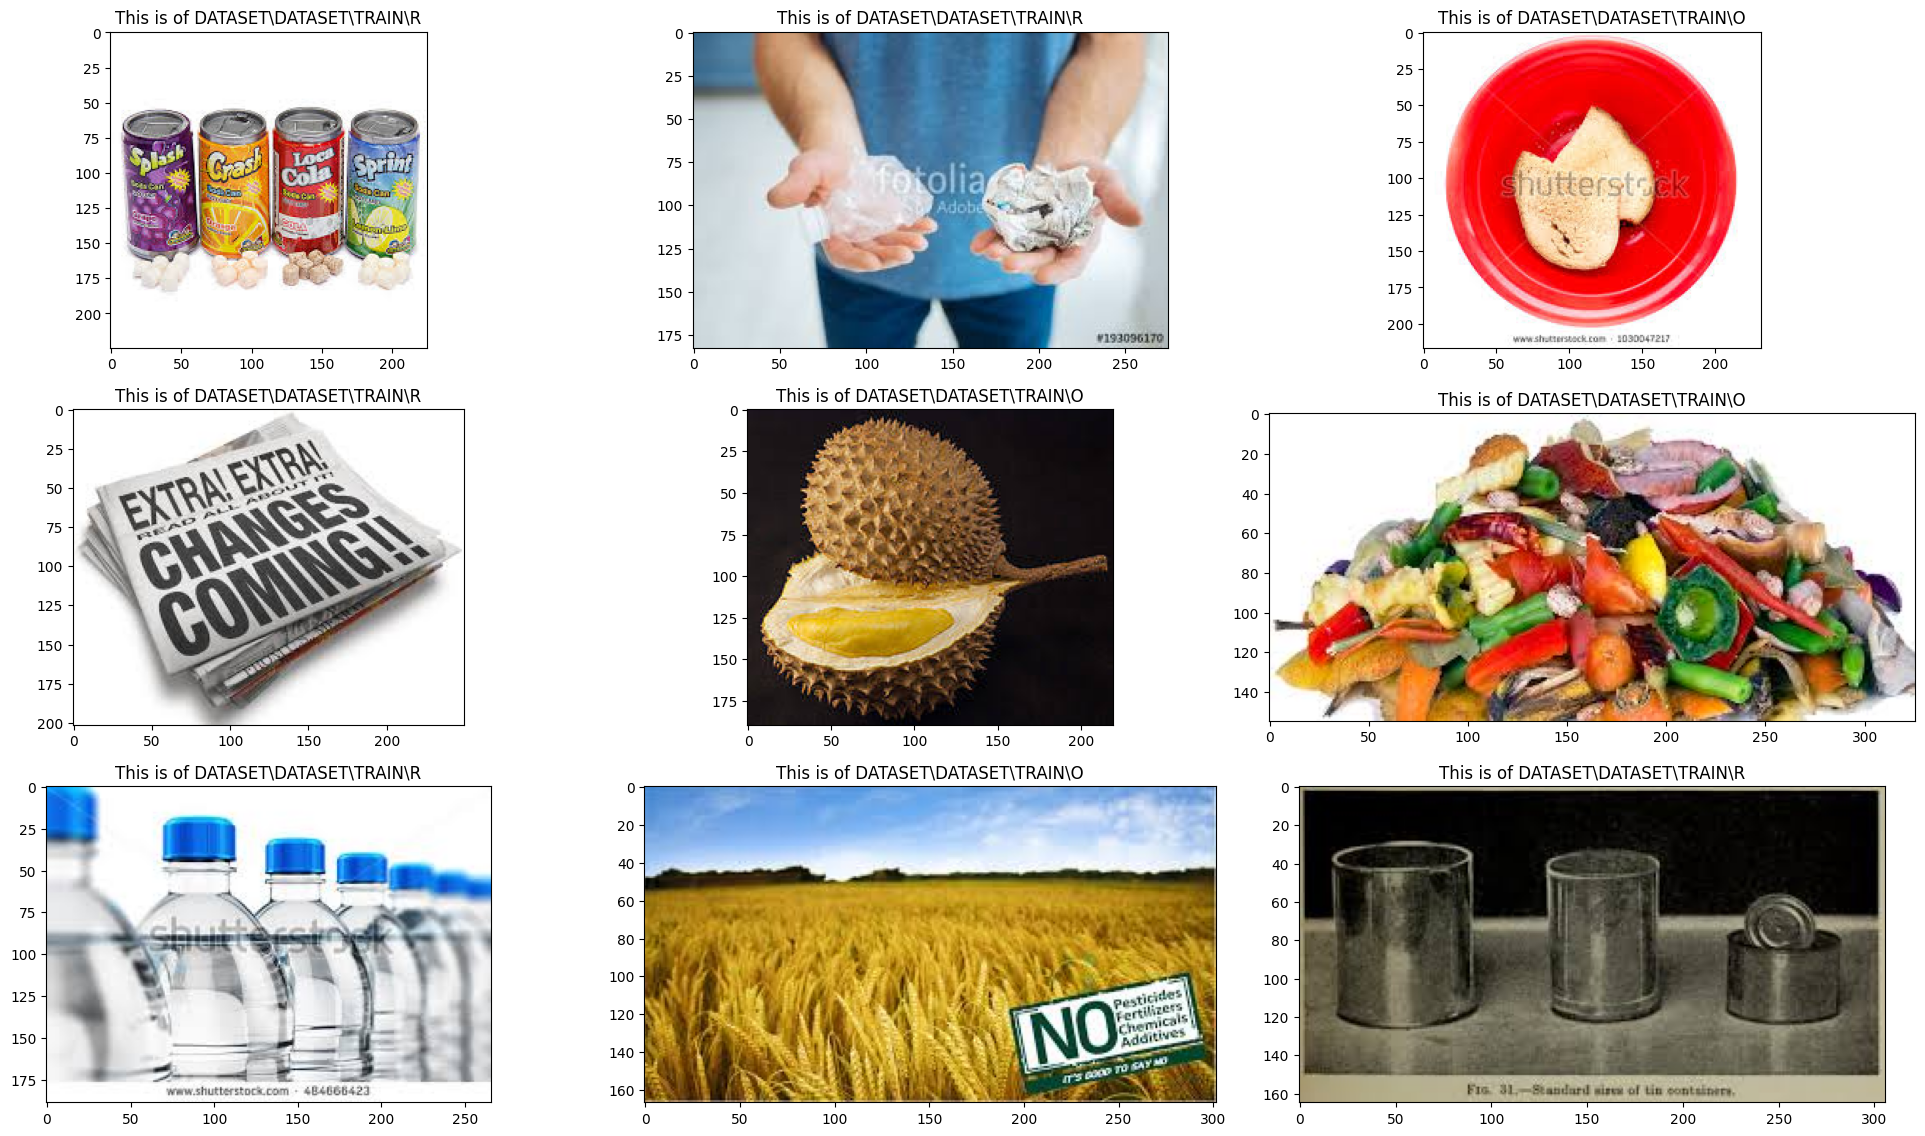

In [14]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [15]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [16]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Adjust batch size
batch_size = 32 # Increased from 64 to stabilize training

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

# Data processing(rescaling)

In [33]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [34]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# Training the model

In [21]:
hist = model.fit(
    train_generator,
    epochs=10,  # Reduced from 15 to prevent overfitting
    validation_data=test_generator)

Epoch 1/10
706/706 [==============================] - 86s 115ms/step - loss: 0.4563 - accuracy: 0.8085 - val_loss: 0.3387 - val_accuracy: 0.8639
Epoch 2/10
706/706 [==============================] - 66s 94ms/step - loss: 0.3786 - accuracy: 0.8449 - val_loss: 0.2746 - val_accuracy: 0.8981
Epoch 3/10
706/706 [==============================] - 66s 94ms/step - loss: 0.3515 - accuracy: 0.8596 - val_loss: 0.3271 - val_accuracy: 0.8563
Epoch 4/10
706/706 [==============================] - 66s 94ms/step - loss: 0.3233 - accuracy: 0.8696 - val_loss: 0.2917 - val_accuracy: 0.8898
Epoch 5/10
706/706 [==============================] - 66s 94ms/step - loss: 0.2850 - accuracy: 0.8873 - val_loss: 0.3339 - val_accuracy: 0.9005
Epoch 6/10
706/706 [==============================] - 67s 95ms/step - loss: 0.2380 - accuracy: 0.9089 - val_loss: 0.3019 - val_accuracy: 0.8973
Epoch 7/10
706/706 [==============================] - 66s 94ms/step - loss: 0.1892 - accuracy: 0.9290 - val_loss: 0.3374 - val_accuracy

# Checking the model performance

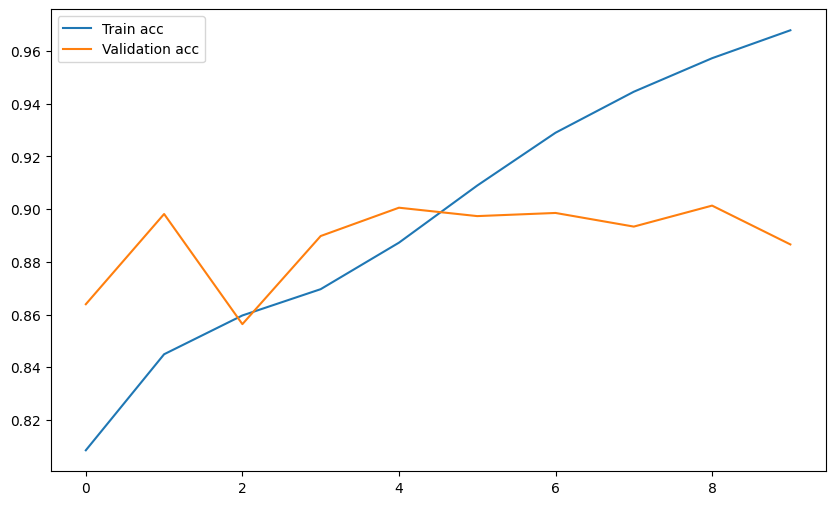

In [22]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

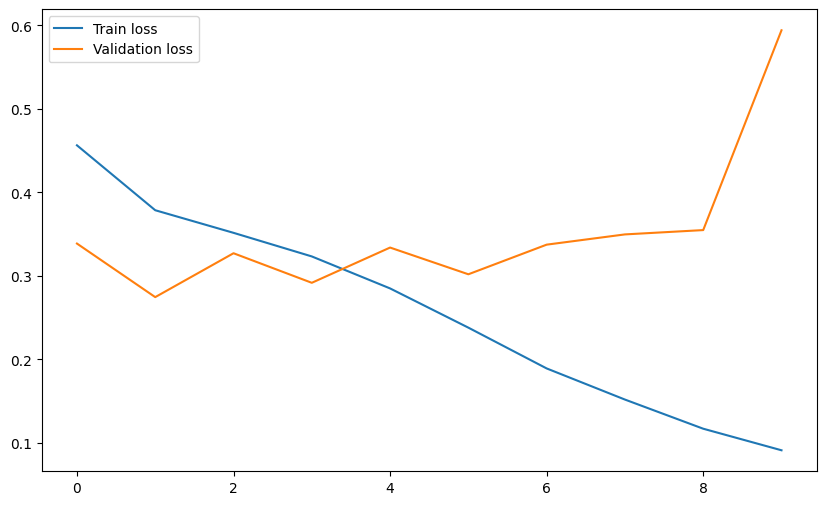

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [24]:
def predict_func(img):
    # Display the image
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()

    # Preprocessing the image
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])

    # Make the prediction
    predictions = model.predict(img)

    # Get the class with the highest probability
    result = np.argmax(predictions)

    # Display the result
    if result == 0:
        print(f"This is Recyclable")
    elif result == 1:
        print(f"This is Organic")

1/1 [==============================] - 0s 420ms/step
This is Organic


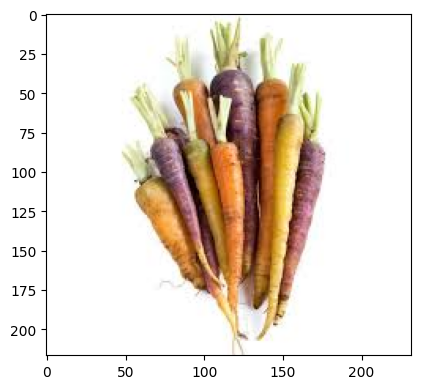

In [26]:
test_img = cv2.imread("DATASET\DATASET\TEST\O\O_12574.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 15ms/step
This is Recyclable


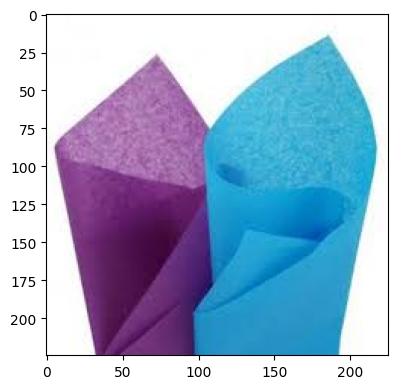

In [27]:
test_img = cv2.imread("DATASET\DATASET\TEST\R\R_10753.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 14ms/step
This is Organic


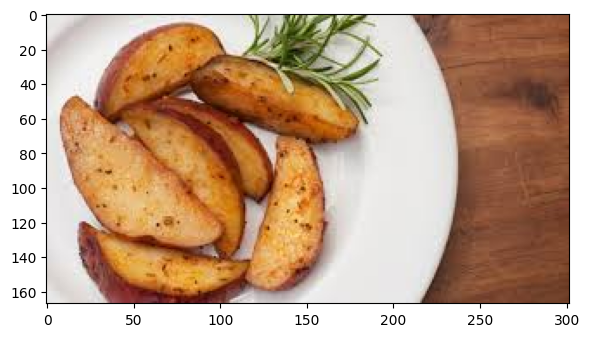

In [29]:
test_img = cv2.imread("DATASET\DATASET\TEST\O\O_13005.jpg")
predict_func(test_img)

# Save the model

In [30]:

model.save('waste_classification_model.h5')


# Converting the saved model into tflite(Tensorflow Lite)

In [32]:
import tensorflow as tf
model = tf.keras.models.load_model('waste_classification_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)
print("TFLite model saved successfully!")

INFO:tensorflow:Assets written to: C:\Users\deepa\AppData\Local\Temp\tmp40_z1260\assets


INFO:tensorflow:Assets written to: C:\Users\deepa\AppData\Local\Temp\tmp40_z1260\assets


TFLite model saved successfully!
